# Finding the emittance of the muon

The expression we found for the emittance of the muon was $$ <J_{x_{\mu}}> = \frac{1}{2} \left(\gamma_{\mu} \beta_p\varepsilon_p - 2\alpha_\mu\alpha_p\varepsilon_p + \beta_{x_\mu}\left(\frac{\alpha_p^2+1}{\beta_p}\varepsilon_p + \delta^2 \right)\right)$$

From the previous calculations we already have the optical parameters. The inputs of the problem are $\delta$ and $\varepsilon_p$

We are going to vary some of the parameters to find the best achievable 

In [2]:
%matplotlib notebook 
# allows to move around in 3D figures
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math as m
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 15})


plt.rcParams["figure.figsize"] = (10,5) # to ge bigger figures

In [3]:
v_c = 299792458 ; # speed of light in m/s
s_e = (0.230)**2 # square of the energy in the center of mass in GeV
E_e = 45 ; # energy of the positron in GeV
E_mu = 22 ; # energy of the muon in GeV

q_e = 1; #charge of a positron in units of an electron charge
q_mu = 1; #charge of a muon in units of an electron charge

m_e = 0.511*10**(-3); # mass of the positron in GeV/c^2
m_mu = 0.10565; # mass of the muon in GeV/c^2

gamma_e = np.sqrt(s_e)/(2*m_e); # approximately 225

dB = 575; # from 550 T/m to 610 T/m TO BE SET
L_q = 2.73 # given length of the quadrupole
s_energy = 0.230**2; # s the square of the energy in the center of mass frame
delta = 4*m_e/s_energy*(np.sqrt(s_energy/4-m_mu**2));


In [4]:
def CourantSnyder(f, L, s) :
# f the focal length
# L the drift length
# s the division of the beam line in the FODO cell
# Building the transfer matrix of the FODO cell
    size = len(s)
    Rx1 = 1 - L/f*(1+L/f); Rx2 = L/f*(2*f+L); Rx3 = -L/(f**2); Rx4 = 1+L/f;
    Ry1 = 1 + L/f*(1-L/f); Ry2 = L/f*(2*f-L); Ry3 = -L/f**2; Ry4 = 1-L/f;
    Rx = np.matrix([[Rx1, Rx2], [Rx3, Rx4]]);
    Ry = np.matrix([[Ry1, Ry2], [Ry3, Ry4]]);

    tr = Rx1 + Rx4
    # the coefficients at the focusing quadrupole
    mu_x = m.acos(tr/2); 
    alpha_x0 = (Rx1 - Rx4)/(2*np.sin(mu_x));
    beta_x0 = Rx2/np.sin(mu_x);
    gamma_x0 = -Rx3/np.sin(mu_x);
    test = beta_x0*gamma_x0 - alpha_x0**2

    # the coefficients at the defocusing quadrupole
    tr= np.asscalar(Ry.trace());
    mu_y = m.acos(tr/2) ;
    alpha_y0 = (Ry1 - tr/2)/np.sin(mu_y);
    beta_y0 = Ry2/np.sin(mu_y);
    gamma_y0 = -Ry3/np.sin(mu_y); 
    test = beta_y0*gamma_y0 - alpha_y0**2

    # drift after focusing
    a = L**2/(4*beta_x0);
    b = L ;
    c = beta_x0 + L **2/beta_x0 - beta_y0 ;
    Delta = b**2 - 4*a*c;

    c_1 = (-b + np.sqrt(Delta))/(2*a) # this solution of the polynomial is the physical one
    c_2 = beta_x0;

    beta_FD =  [(c_1**2 + 4)*x**2/(4*c_2) + c_1*x + c_2 for x in s] ;#beta in the drift following the focusing quadrupole
    alpha_FD =  [ -1/2*((c_1**2 + 4)*x/(2*c_2) + c_1) for x in s];
    gamma_FD = [(1 + alpha_FD[i]**2)/beta_FD[i] for i in range(size)];

    # drift after focusing
    a = L**2/(4*beta_y0);
    b = L;
    c = beta_y0 + L**2/beta_y0 - beta_x0 ;
    Delta = b**2 - 4*a*c;
    c_1 = (-b + np.sqrt(Delta))/(2*a) # this solution of the polynomial is the physical one
    c_2 = beta_y0;

    beta_DD =  [(c_1**2 + 4)*x**2/(4*c_2) + c_1*x + c_2 for x in s] ;#beta in the drift following the defocusing quadrupole
    alpha_DD =  [ -1/2*((c_1**2 + 4)*x/(2*c_2) + c_1) for x in s];
    gamma_DD = [(1 + alpha_DD[i]**2)/beta_DD[i] for i in range(size)];

    beta = beta_FD + beta_DD;
    alpha = alpha_FD + alpha_DD;
    gamma = gamma_FD + gamma_DD;
    beta = np.array(beta)
    alpha = np.array(alpha)
    gamma = np.array(gamma)
    
    return beta, alpha, gamma

# Study of variations
### Modifying $\varepsilon_p$

<ipython-input-163-f5bdadbf2f3c>:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


<IPython.core.display.Javascript object>


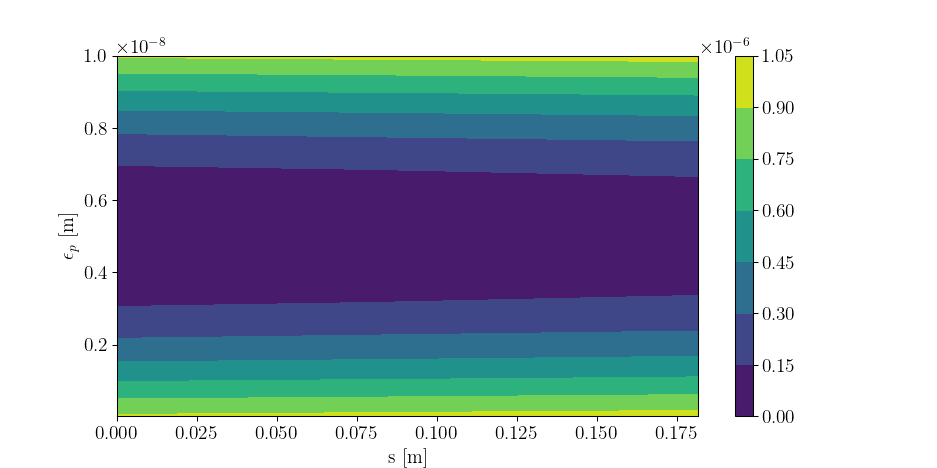

<IPython.core.display.Javascript object>


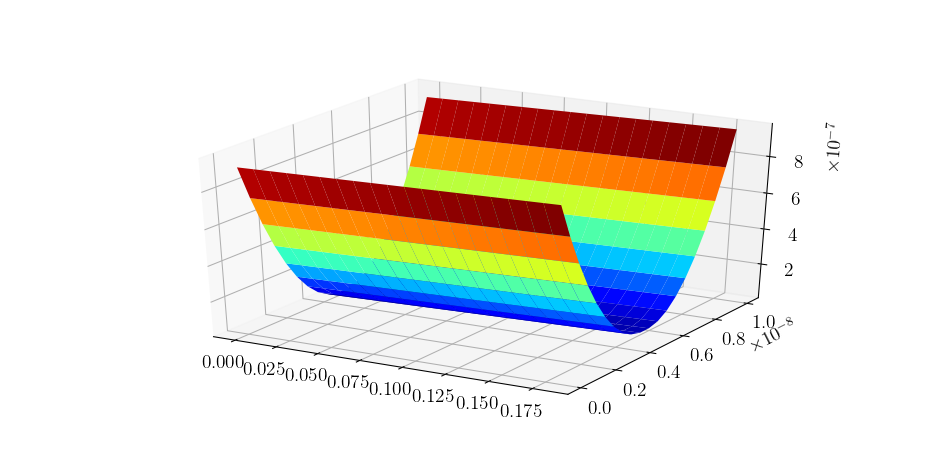

<IPython.core.display.Javascript object>


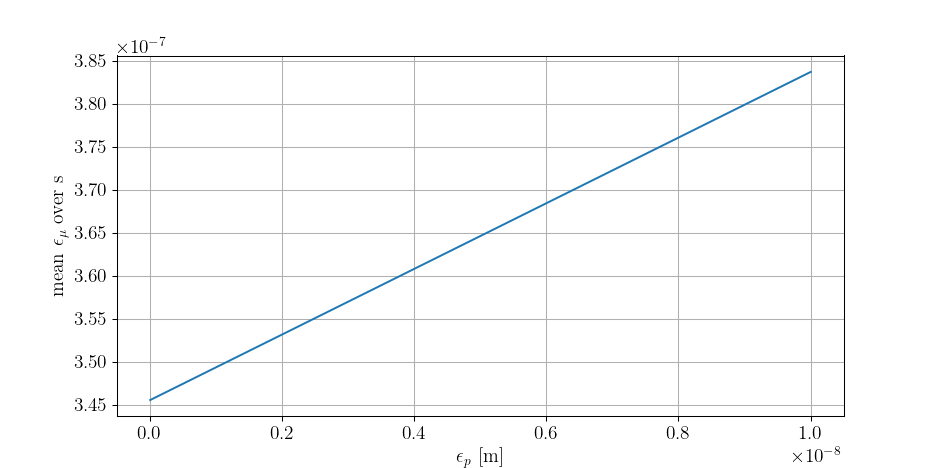

In [164]:
#Positron
P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
k_1e = q_e/(P_e*10**9/v_c)*dB  # k_1 in a 
f = 1/(k_1e*L_q); # focal of this particle
L_e = 1.9*f

#muon
P_mu = P_e/2; # half because both of the particles have the same masses
k_1mu = q_mu/(P_mu*10**9/v_c)*dB  # k_1 in a quadrupole
f_mu = 1/(k_1mu*L_q); # focal of this particle
L_mu = 1.9*f_mu

L = min([L_e,L_mu])
#dividing the FODO cell
size = 10
s = np.linspace(0,L,size);
epsilon_e = np.linspace(10**(-11),10**(-8),num=2*size)
FODO_length = np.linspace(0,2*L,2*size)


#Get the courant snyder parameters of the positron
beta_e, alpha_e, gamma_e = CourantSnyder(f, L, s)
#Get the courant snyder parameters of the muon positive
beta_mu, alpha_mu, gamma_mu = CourantSnyder(f_mu, L, s)
#Get the courant snyder parameters of the muon positive
beta_mum, alpha_mum, gamma_mum = CourantSnyder(-f_mu, L, s)


epsilon_muA = np.zeros((2*size,2*size))
espilon_muA_mean = np.zeros(2*size)

for i in range(2*size) : #along s
    for j in range(2*size) : #along the values of epsilon_e
        epsilon_muA[i,j] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e[j] - 2*alpha_mu[i]*alpha_e[i]*epsilon_e[j] + 
                               beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e[j] + delta**2))

for j in range(2*size) : #along the values of s
    espilon_muA_mean[j] = np.mean(epsilon_muA[:,j])

val_minA = epsilon_muA.min()
min_indicesA = np.where(epsilon_muA == val_min)

(x, y) = np.meshgrid(FODO_length, epsilon_e)
plt.figure(0)
plt.contourf(x,y,epsilon_muA);
plt.colorbar()
plt.xlabel(r's [m]')
plt.ylabel(r'$\epsilon_p$ [m]')


fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, epsilon_muA, cmap=plt.cm.jet)

fig = plt.figure(2)
plt.plot(epsilon_e, espilon_muA_mean)
plt.xlabel(r'$\epsilon_p$ [m]')
plt.ylabel(r'mean $\epsilon_{\mu}$ over s')
plt.grid()

### Modifying $\frac{dB}{dx}$

<ipython-input-163-f5bdadbf2f3c>:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


<IPython.core.display.Javascript object>


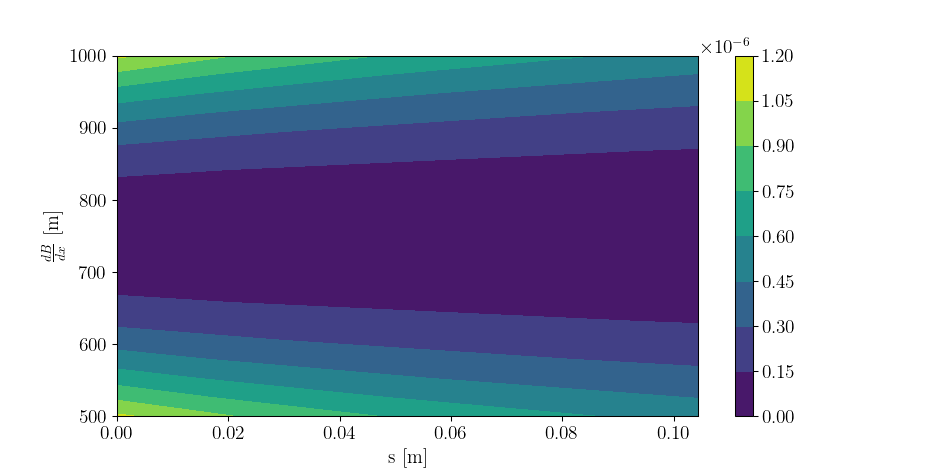

<IPython.core.display.Javascript object>


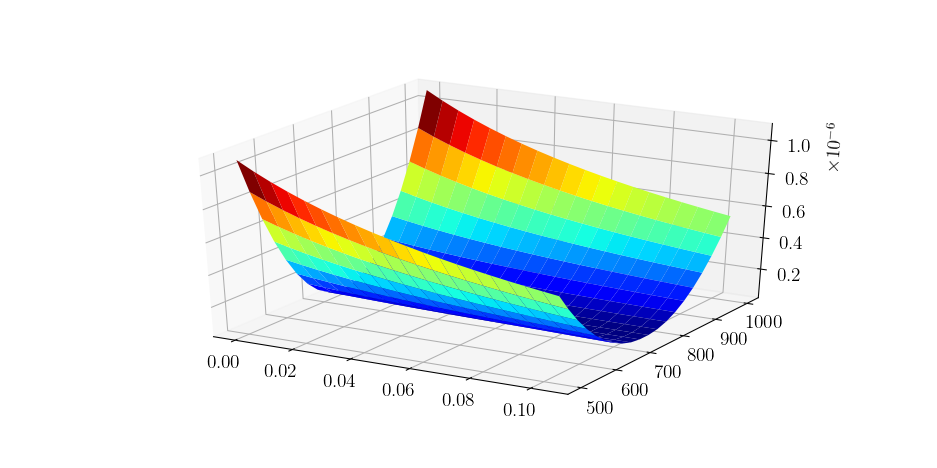

<IPython.core.display.Javascript object>


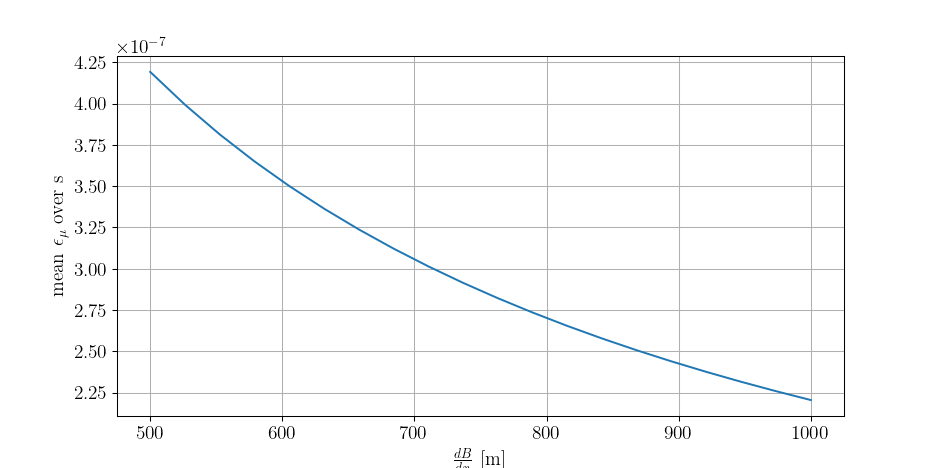

In [165]:
size = 10

epsilon_e  = 5.73*10**(- 9) # emittance of the positron beam from the paper (in meters)
epsilon_muB = np.zeros((2*size, 2*size))
dB = np.linspace(500,1000,num = 2*size)

for j in range(2*size) : # variation of dB
     #Positron
    P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
    k_1e = q_e/(P_e*10**9/v_c)*dB[j]
    f = 1/(k_1e*L_q); # focal of this particle
    L_e = 1.9*f
    #muon
    P_mu = P_e/2; # half because both of the particles have the same masses
    k_1mu = q_mu/(P_mu*10**9/v_c)*dB[j]  # k_1 in a quadrupole
    f_mu = 1/(k_1mu*L_q); # focal of this particle
    L_mu = 1.9*f_mu
    
    L = min([L_e,L_mu])
    
    s = np.linspace(0,L,size);
    FODO_length = np.linspace(0,2*L,2*size)
    
    #Get the courant snyder parameters of the positron
    beta_e, alpha_e, gamma_e = CourantSnyder(f, L, s)
    #Get the courant snyder parameters of the muon positive
    beta_mu, alpha_mu, gamma_mu = CourantSnyder(f_mu, L, s)
    #Get the courant snyder parameters of the muon positive
    beta_mum, alpha_mum, gamma_mum = CourantSnyder(-f_mu, L, s)
    for i in range(2*size) :
            epsilon_muB[i,j] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e - 2*alpha_mu[i]*alpha_e[i]*epsilon_e + 
                               beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));
            
espilon_muB_mean = np.zeros(2*size)
for j in range(2*size) : #along the values of s
    espilon_muB_mean[j] = np.mean(epsilon_muB[:,j])

val_minB = epsilon_muB.min()
min_indicesB = np.where(epsilon_muB == val_minB)

(x, y) = np.meshgrid(FODO_length, dB)
fig = plt.figure(3)
plt.contourf(x,y,epsilon_muB);
plt.colorbar()
plt.xlabel(r's [m]')
plt.ylabel(r'$\frac{dB}{dx}$ [m]')

fig = plt.figure(4)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, epsilon_muB, cmap=plt.cm.jet)

fig = plt.figure(5)
plt.plot(dB, espilon_muB_mean)
plt.xlabel(r'$\frac{dB}{dx}$ [m]')
plt.ylabel(r'mean $\epsilon_{\mu}$ over s')
plt.grid()

### Modifying $L$ 


<ipython-input-163-f5bdadbf2f3c>:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


<IPython.core.display.Javascript object>


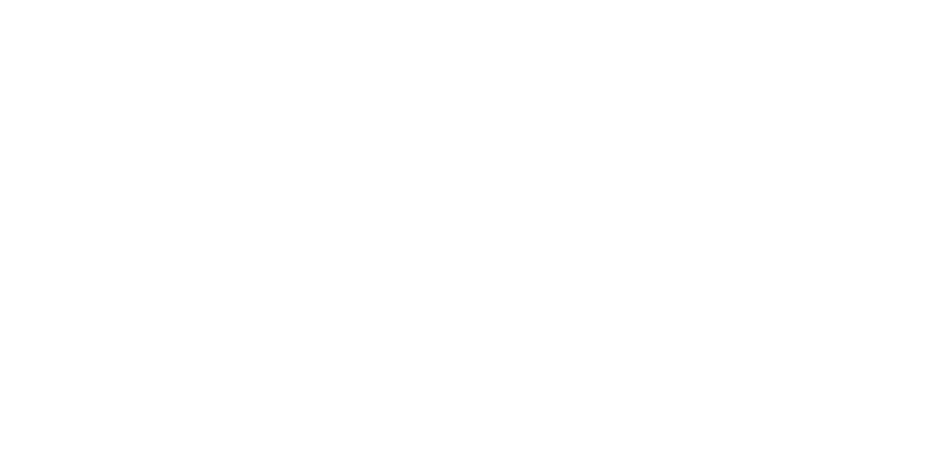

<IPython.core.display.Javascript object>


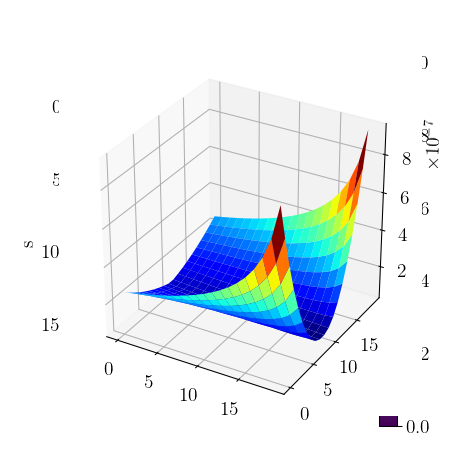

<IPython.core.display.Javascript object>


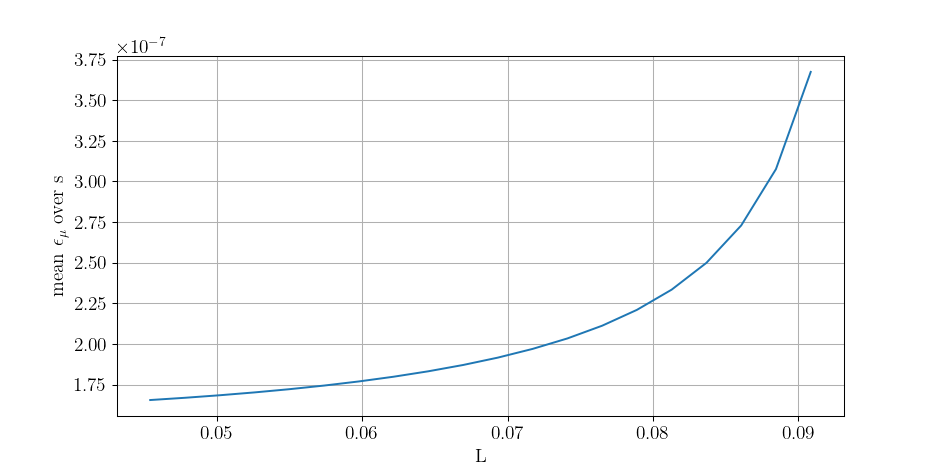

In [166]:
size = 10

epsilon_e  = 5.73*10**(- 9) # emittance of the positron beam from the paper (in meters)
epsilon_muC = np.zeros((2*size, 2*size))
dB = 575
#Positron
P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
k_1e = q_e/(P_e*10**9/v_c)*dB
f = 1/(k_1e*L_q); # focal of this particle
L_e = 1.9*f
#muon
P_mu = P_e/2; # half because both of the particles have the same masses
k_1mu = q_mu/(P_mu*10**9/v_c)*dB  # k_1 in a quadrupole
f_mu = 1/(k_1mu*L_q); # focal of this particle
L_mu = 1.9*f_mu

L = min([L_e,L_mu])

L = np.linspace(L/2,L,num = 2*size)

for j in range(2*size) : # variation of dB    
    s = np.linspace(0,L[j],size);
    #Get the courant snyder parameters of the positron
    beta_e, alpha_e, gamma_e = CourantSnyder(f, L[j], s)
    #Get the courant snyder parameters of the muon positive
    beta_mu, alpha_mu, gamma_mu = CourantSnyder(f_mu, L[j], s)
    #Get the courant snyder parameters of the muon positive
    beta_mum, alpha_mum, gamma_mum = CourantSnyder(-f_mu, L[j], s)
    for i in range(2*size) :
            epsilon_muC[i,j] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e - 2*alpha_mu[i]*alpha_e[i]*epsilon_e + 
                               beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));

espilon_muC_mean = np.zeros(2*size)
for j in range(2*size) : #along the values of s
    espilon_muC_mean[j] = np.mean(epsilon_muC[:,j])
    
    
val_min = epsilon_muC.min()
min_indices = np.where(epsilon_muC == val_min)

fig = plt.figure(6)
plt.matshow(epsilon_muC);
plt.scatter(min_indices[1], min_indices[0],color='r',marker='x')
plt.colorbar()
plt.xlabel('L')
plt.ylabel('s')

(x, y) = np.meshgrid(np.arange(epsilon_muC.shape[0]), np.arange(epsilon_muC.shape[1]))
fig = plt.figure(7)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, epsilon_muC, cmap=plt.cm.jet)

fig = plt.figure(8)
plt.plot(L, espilon_muC_mean)
plt.xlabel('L')
plt.ylabel(r'mean $\epsilon_{\mu}$ over s')
plt.grid()

### modifying both $dB$ and $L$

In [167]:
from math import nan
size = 50

epsilon_e  = 5.73*10**(- 9) # emittance of the positron beam from the paper (in meters)
dB = np.linspace(500,1000,num = 2*size)
All_L = np.zeros(2*size) # will be used to find the appropriate maximum length  
f = np.zeros(2*size) # will store the values of f calculated with different B
f_mu = np.zeros(2*size)  # will store the values of f_mu calculated with different B

for k in range(2*size) :# variation of dB
    #Positron
    P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
    k_1e = q_e/(P_e*10**9/v_c)*dB[k]
    f[k] = 1/(k_1e*L_q); # focal of this particle
    #muon
    P_mu = P_e/2; # half because both of the particles have the same masses
    k_1mu = q_mu/(P_mu*10**9/v_c)*dB[k]  # k_1 in a quadrupole
    f_mu[k] = 1/(k_1mu*L_q); # focal of this particle
    L_mu = 1.9*f_mu[k]

L = np.linspace(0.001,0.1,num = 2*size)
epsilon_mu = np.zeros((2*size, 2*size,2*size))
epsilon_mu_mean = np.zeros((2*size, 2*size))


for k in range(2*size) : # variation of dB
    for j in range(2*size) : # variation of L  
        if (L[j] > 2*f_mu[k]) or (L[j] > 2*f[k]) :
            epsilon_mu_mean[j,k] = 0
            break 
        else :
            s = np.linspace(0,L[j],size);
            #Get the courant snyder parameters of the positron
            beta_e, alpha_e, gamma_e = CourantSnyder(f[k], L[j], s)
            #Get the courant snyder parameters of the muon positive
            beta_mu, alpha_mu, gamma_mu = CourantSnyder(f_mu[k], L[j], s)
            #Get the courant snyder parameters of the muon negative
            beta_mum, alpha_mum, gamma_mum = CourantSnyder(-f_mu[k], L[j], s)

            for i in range(2*size) :# variation of s 
                    epsilon_mu[i,j,k] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e - 2*alpha_mu[i]*alpha_e[i]*epsilon_e + 
                                       beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));

            epsilon_mu_mean[j,k] = np.mean(epsilon_mu[:,j,k]) # mean on the s


val_min = epsilon_mu_mean.min()
min_indices = np.where(epsilon_mu_mean == val_min)

# fig = plt.figure(10)
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x, y, epsilon_mu_mean, cmap=plt.cm.jet)

<ipython-input-163-f5bdadbf2f3c>:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


In [168]:
(x, y) = np.meshgrid(dB, L)
fig = plt.figure(9)
plt.contourf(x,y,epsilon_mu_mean,  cmap=plt.cm.jet, levels = np.linspace(10**(-9),3*10**(-7)));
# plt.scatter(min_indices[1], min_indices[0],color='r',marker='x')
plt.colorbar()
plt.xlabel('dB')
plt.ylabel('L')
plt.grid()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


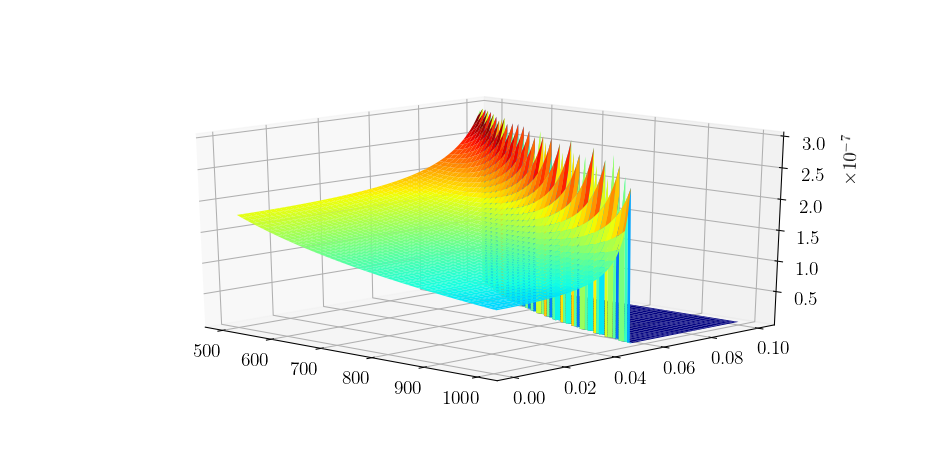

In [134]:
epsilon_mu_mean[epsilon_mu_mean>3*10**(-7)] = 0

fig = plt.figure(10)
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(10**(-9),3*10**(-7))
surf = ax.plot_surface(x, y, epsilon_mu_mean, cmap=plt.cm.jet)

###  Varying $dB$ and $L_q$

In this first portion of code we calculate the possible length of the drift space (and thus half the size of the FODO lattice in a thin lenses approximation) when varying the gradient of magnetic field and the real length of the quadrupole. 


In [9]:
from math import nan
size = 30

epsilon_e  = 5.73*10**(-9) # emittance of the positron beam from the paper (in meters)
dB = np.linspace(550,800,num = 2*size)
L_q = np.linspace(0.1,2,num=2*size) # vary magnet length 
L = np.zeros((2*size,2*size)) # vary drift length + quad length

f_e = np.zeros((2*size,2*size)) # will store the values of f calculated with different B
f_mu = np.zeros((2*size,2*size))# will store the values of f calculated with different B

epsilon_mu = np.zeros((2*size, 2*size,2*size))
epsilon_mu_mean = np.zeros((2*size, 2*size))

for j in range(2*size) : # variation of L_q 
    for k in range(2*size) : # variation of dB    
        #Positron
        P_e = np.sqrt(E_e**2 - m_e**2); # canonical momentum of the positron in GeV/c at the entrance
        k_1e = q_e/(P_e*10**9/v_c)*dB[k]
        f_e[j,k] = 1/(k_1e*L_q[j]); # focal of this particle
        L_e_max = 1.999*f_e[j,k]

        #muon
        P_mu = P_e/2; # half because both of the particles have the same masses
        k_1mu = q_mu/(P_mu*10**9/v_c)*dB[k]  # k_1 in a quadrupole
        f_mu[j,k] = 1/(k_1mu*L_q[j]); # focal of this particle
        L_mu_max = 1.999*f_mu[j,k]
        L[j,k] = min([L_e_max,L_mu_max]) #L_mu always smaller
        L_q
        # f_mu always smaller 
        if (not(L_q[j] <= L[j,k] <= 1.999*f_mu[j,k])) : # condition on the maximum length of the drift space
            L[j,k] = 0


In [10]:
for j in range(2*size) : # variation of dB    
    for k in range(2*size) : # variation of L_q 
        if (L[j,k] == 0):
            epsilon_mu_mean[j,k] = nan
            break 
        else :
            s = np.linspace(0,L[j,k],size);
            #Get the courant snyder parameters of the positron
            beta_e, alpha_e, gamma_e = CourantSnyder(f_e[j,k], L[j,k], s)
            #Get the courant snyder parameters of the muon positive
            beta_mu, alpha_mu, gamma_mu = CourantSnyder(f_mu[j,k], L[j,k], s)
            #Get the courant snyder parameters of the muon negative
            beta_mum, alpha_mum, gamma_mum = CourantSnyder(-f_mu[j,k], L[j,k], s)
            
            for i in range(2*size) :# variation of s 
                epsilon_mu[i,j,k] = 1/2*(gamma_mu[i]*beta_e[i]*epsilon_e - 2*alpha_mu[i]*alpha_e[i]*epsilon_e + 
                                       beta_mu[i]*((alpha_e[i]**2+1)/beta_e[i]*epsilon_e + delta**2));

            epsilon_mu_mean[j,k] = np.mean(epsilon_mu[:,j,k]) # mean on the s


<ipython-input-4-f5bdadbf2f3c>:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


<IPython.core.display.Javascript object>


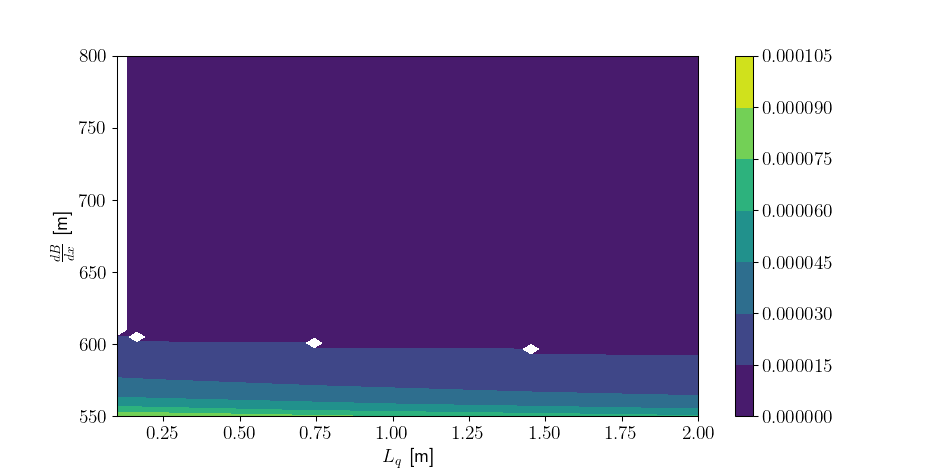

Text(0, 0.5, '$\\frac{dB}{dx}$ [m]')

In [11]:
(x, y) = np.meshgrid(L_q,dB)
fig = plt.figure(20)
plt.contourf(x,y,epsilon_mu_mean);
plt.colorbar()
plt.xlabel(r'$L_q$ [m]')
plt.ylabel(r'$\frac{dB}{dx}$ [m]')

<IPython.core.display.Javascript object>


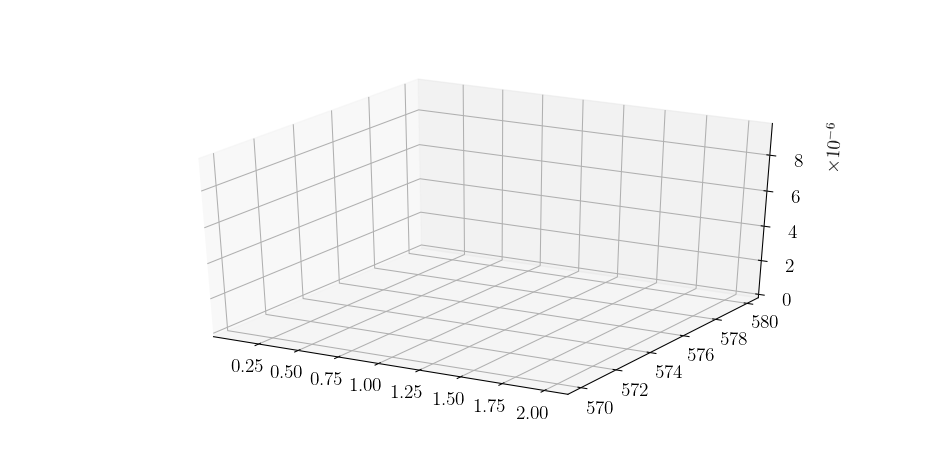

<ipython-input-306-a3970deb4fc7>:3: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(x, y, epsilon_mu_mean, cmap=plt.cm.jet)


In [306]:
fig = plt.figure(30)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, epsilon_mu_mean, cmap=plt.cm.jet)